# 11_Radial_Basis_Kernel

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from src.plot import plot_spatial, palette_celltype, plot_obs_spatial
import pandas as pd
import numpy as np
palette_entity_anno = palette_celltype.copy()
palette_entity_anno['gene'] = "lightgray"
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [3]:
import os
import simba as si
si.__version__

/data/pinello/SHARED_SOFTWARE/anaconda_latest/envs/cc_envs/cc_simba_only/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'1.2'

In [4]:
workdir = 'data/11'
si.settings.set_workdir(workdir)

Saving results in: data/11


In [5]:
si.settings.set_figure_params(
    dpi=80,
    style='white',
    fig_size=[5,5],
    rc={'image.cmap': 'viridis'}
)

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')

# RBF

In [7]:
from sklearn.metrics.pairwise import rbf_kernel

In [6]:
adata_fn = "/data/pinello/PROJECTS/2025-01-31_CC_Spatial_SIMBA/SIMBA_in_space/data/human_DLPFC/151507.h5ad"
adata = sc.read_h5ad(adata_fn)

In [74]:
gamma = 1e-6
K = rbf_kernel(X=adata.obsm['spatial'], gamma=gamma)

In [75]:
K

array([[1.00000000e+00, 1.60720699e-31, 2.78493682e-02, ...,
        1.47753054e-23, 1.36459981e-13, 1.49194596e-03],
       [1.60720699e-31, 1.00000000e+00, 1.17362583e-21, ...,
        5.10352826e-12, 1.85540707e-12, 1.34044357e-17],
       [2.78493682e-02, 1.17362583e-21, 1.00000000e+00, ...,
        2.55087631e-21, 3.01856368e-12, 5.86336748e-01],
       ...,
       [1.47753054e-23, 5.10352826e-12, 2.55087631e-21, ...,
        1.00000000e+00, 3.80212525e-02, 3.88279699e-19],
       [1.36459981e-13, 1.85540707e-12, 3.01856368e-12, ...,
        3.80212525e-02, 1.00000000e+00, 6.53825966e-11],
       [1.49194596e-03, 1.34044357e-17, 5.86336748e-01, ...,
        3.88279699e-19, 6.53825966e-11, 1.00000000e+00]])

In [76]:
adata.obsm['spatial']

array([[3276, 2514],
       [9178, 8520],
       [5133, 2878],
       ...,
       [4218, 9703],
       [4017, 7906],
       [5683, 3359]])

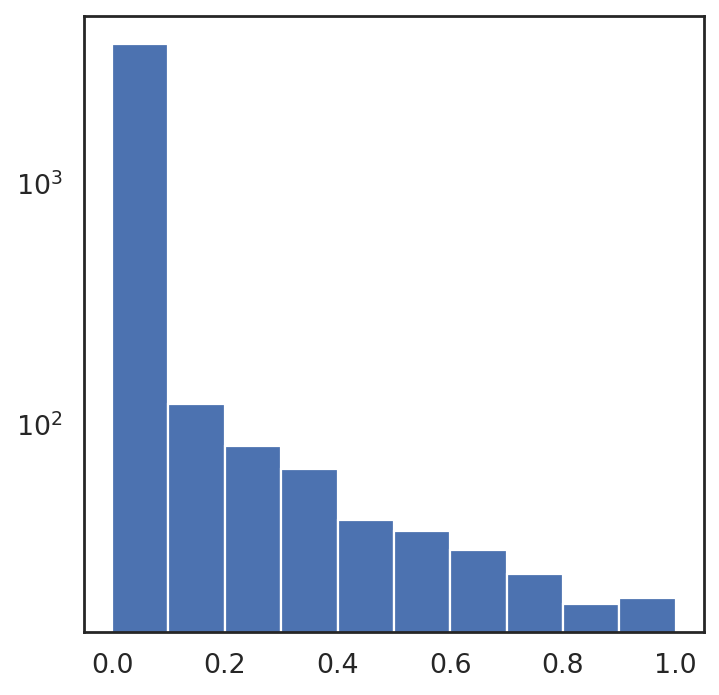

In [77]:
plt.hist(K[500, :])
plt.yscale('log')
plt.show()

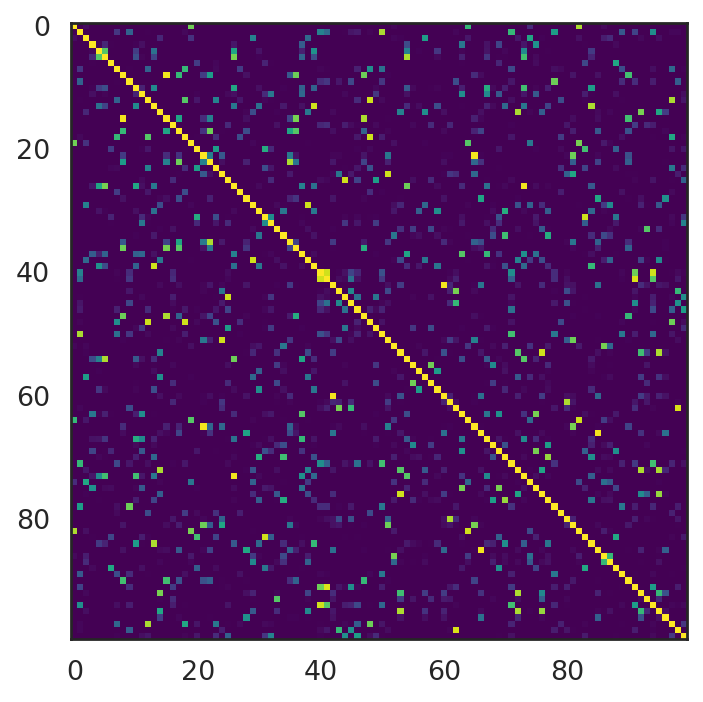

In [78]:
plt.imshow(K[:100, :100])

In [79]:
spots = adata.obsm['spatial'].copy()

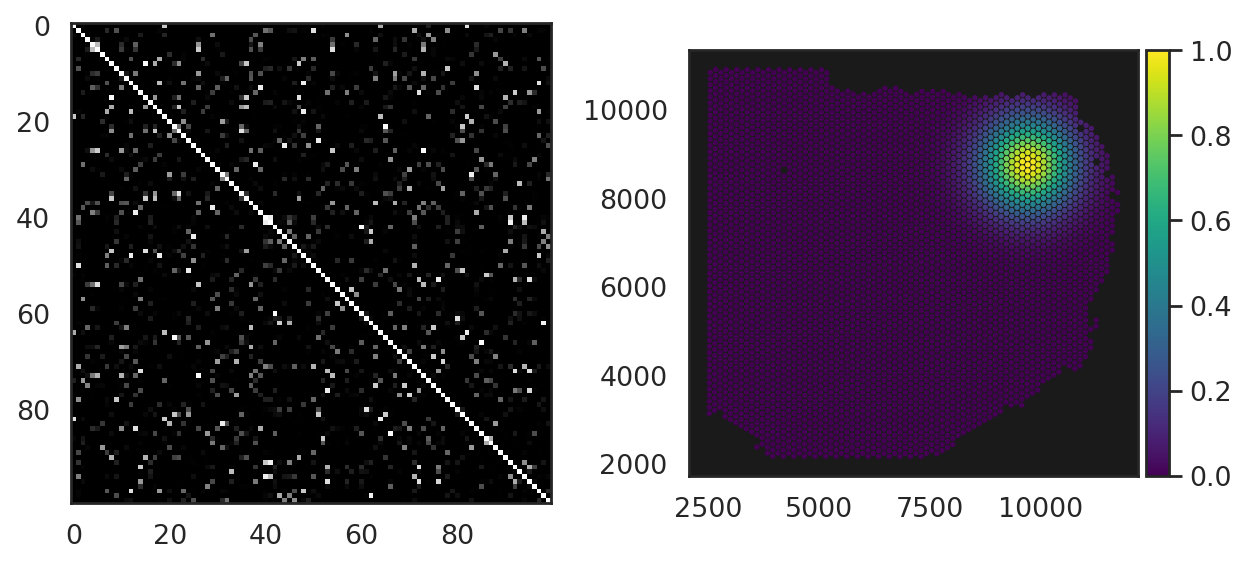

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(8, 12))
axes[0].imshow(K[:100, :100], cmap='gray')

im = axes[1].scatter(spots[:, 1], spots[:, 0], c=K[1500], s=2)
axes[1].set_facecolor('k')
axes[1].set_aspect('equal', adjustable='box')

divider = make_axes_locatable(axes[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')
plt.tight_layout()
plt.show()